In [1]:
import pandas as pd
import numpy as np

!pip matplotlib==3.4.3
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();


from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

ERROR: unknown command "matplotlib==3.4.3"



# Upload Dataset

In [2]:
df = pd.read_csv("loan_data_2007_2014.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data2 = pd.read_excel("LCDataDictionary.xlsx", sheet_name="LoanStats")

In [4]:
df.shape

(466285, 75)

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Deskripsi Data

In [6]:
data2

,Unnamed: 0,Description,Unnamed: 2,Unnamed: 3
0,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...,NaN
1,annual_inc,The self-reported annual income provided by th...,Penghasilan tahunan yang dilaporkan sendiri ya...,NaN
2,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...,NaN
3,application_type,Indicates whether the loan is an individual ap...,Menunjukkan apakah pinjaman adalah aplikasi in...,NaN
4,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan,NaN
...,...,...,...,...
75,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.,NaN
76,tot_coll_amt,Total collection amounts ever owed,Total jumlah pengumpulan yang pernah ada,NaN
77,tot_cur_bal,Total current balance of all accounts,Total Saldo Saat Ini dari Semua Akun,NaN
78,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
#Mengecek data duplikat
df.duplicated().sum()

0

terlihat tidak ada data yang duplikat, maka setiap baris sudah mewakili satu individu.

Selanjutnya kita membuang feature-feature tidak berguna seperti feature id, berupa free text, nilainya kosong semua (NULL), dll.

Statistika Deskriptif dari data numerik

In [8]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [9]:
for col in df.columns:
  na = 'column : {:>10}\t persentasi data kosongnya : {:.2f}%'.format(col, 100*(df[col].isna().sum() / df[col].shape[0]))
  print(na)

column : Unnamed: 0	 persentasi data kosongnya : 0.00%
column :         id	 persentasi data kosongnya : 0.00%
column :  member_id	 persentasi data kosongnya : 0.00%
column :  loan_amnt	 persentasi data kosongnya : 0.00%
column : funded_amnt	 persentasi data kosongnya : 0.00%
column : funded_amnt_inv	 persentasi data kosongnya : 0.00%
column :       term	 persentasi data kosongnya : 0.00%
column :   int_rate	 persentasi data kosongnya : 0.00%
column : installment	 persentasi data kosongnya : 0.00%
column :      grade	 persentasi data kosongnya : 0.00%
column :  sub_grade	 persentasi data kosongnya : 0.00%
column :  emp_title	 persentasi data kosongnya : 5.92%
column : emp_length	 persentasi data kosongnya : 4.51%
column : home_ownership	 persentasi data kosongnya : 0.00%
column : annual_inc	 persentasi data kosongnya : 0.00%
column : verification_status	 persentasi data kosongnya : 0.00%
column :    issue_d	 persentasi data kosongnya : 0.00%
column : loan_status	 persentasi data kosongn

maka data numerik yang memiliki 100% data kosong dapat kita hapus dari feature

In [10]:
df_ori = df.dropna(axis=1,how='all')

### Menunjukkan penjelasan dari setiap feature

Terdapat data kategorik dan tidak memiliki data null pada setiap featurnya

In [11]:
df_ori.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


# MENDEFINISIKAN DATA TARGET DAN EDA 

Dalam final project credit risk modeling ini, tujuan utamanya adalah untuk melakukan prediksi terhadap suatu nasabah atas kemampuan mereka untuk melakukan pembayaran terhadap kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan nasabah dalam hal tersebut.

Pada data ini dapat digunakan feature loan_status yang dijadikan sebagai data target karena data tersebut meggambarkan status/perfoema dari setiap nasabah terkait pembayaran terhadap pinjaman/kredit yang diberikan.

In [12]:
title_font = dict(size=20, weight="bold")

def countplot(df, y, title, **sns_kwargs):
    value_counts = df_ori[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(12, 10))
    sns.countplot(data=df_ori, y=y, order=value_counts.index, **sns_kwargs)
    plt.title(title, fontdict=title_font)
    plt.ylabel("")
    plt.show()

    print(percentage)

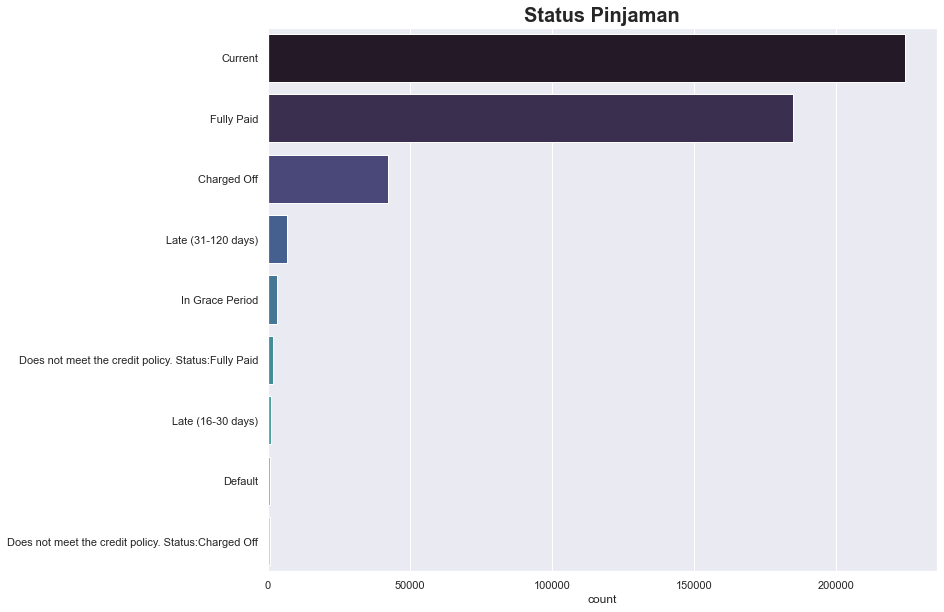

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [13]:
countplot(df_ori, title="Status Pinjaman",  y="loan_status",palette = "mako")

## Status Peminjaman
Terlihat bahwa sebagian besar pinjaman berada pada status "Current", Pada tingkat keberhasilan, pinjaman yang berhasil dibayarkan kembali memiliki rasio yang lebih tinggi ketimbang pinjaman yang terlambat dibayarkan. 



`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Disini kita dapat menentukan data target yang akan digunakan. Data target ditentukan dengan karakteristik dari para individu terhadap pinjaman/kredit yang mereka bayarkan, apakah individu tersebut termasuk bad loan(peminjam yang buruk) atau good loan (peminjamn yang baik).

Definisi dari bad or good loan dapat berbeda tergantung dengan kebutuhan bisnis yang ada. Disini saya menggunakan keterlambatan diatas 1 bulan/30 hari dan yang lebih buruk dari itu untuk dikategorikan sebagai bad loan.


maka kita dapat membagi menjadi 2 kategori : 
- good loan = Fully paid
- Bad loan = Charged Off, Default, dan Does not meet the credit policy,Late (31-120 days).


Pada feature current, in_grace_perid, dan late, tidak dapat digunakan karena ketiga feature tersebut menandakan bahwa pengajuan peminjaman nasabah masih berlangsung.

In [14]:
# Menentukan kategori digunakan
good = ["Fully Paid"]
bad = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (31-120 days)"
]

In [15]:
# Mengganti dengan label baru
def label_loan_status(value):
    if value in good:
        return 1
    return 0

label_loan_status("Fully Paid")

1

In [16]:
pas_df = df_ori[df_ori["loan_status"].isin(good + bad)].copy()
pas_df["loan_status"] = pas_df["loan_status"].apply(label_loan_status)

1    77.72%
0    22.28%
Name: loan_status, dtype: object


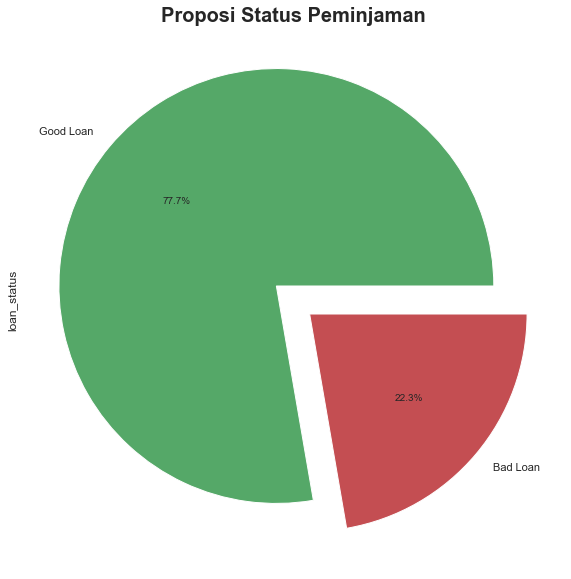

In [21]:
plt.figure(figsize=(12, 10))
plt.title("Proposi Status Peminjaman",fontsize=20,weight="bold")
pas_df["loan_status"].value_counts().plot.pie(explode=[0.1,0.1],labels=["Good Loan","Bad Loan"], autopct='%1.1f%%',colors=["g","r"]);

value_counts = pas_df["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Dapat dilihat bahwa proporsi peminjaman nasabah yang diterima sebesar 77%

# Besarnya Pinjaman pokok Debitur yang sudah dibayarkan

In [22]:
def distributionplot(df, x, title, **sns_kwargs):
    plt.figure(figsize=(12, 10))
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.title(title, fontdict=title_font)
    plt.ylabel("")
    plt.show()

Dapat dilihat jika nasabah yang mengalami gagal bayar banyak yang belum bisa untuk membayarkan uang pokok yang telah dipinjamkanm sehingga pembayaran mereka sampai jatuh tempo. 

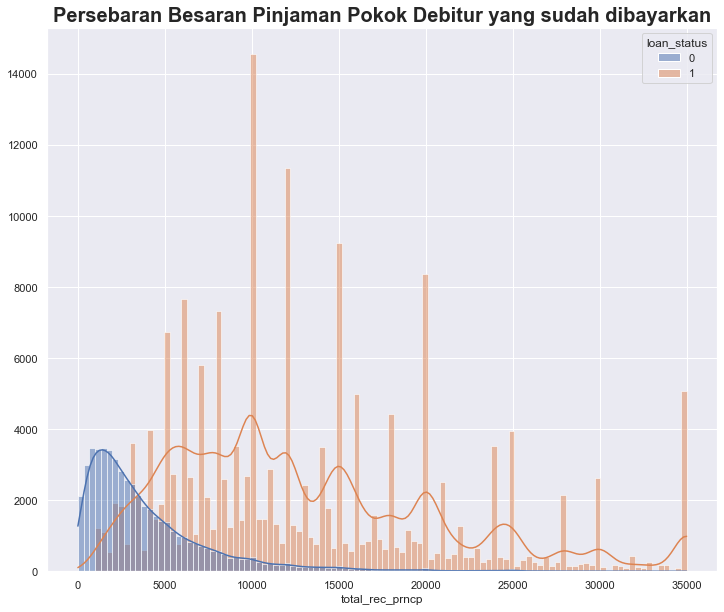

In [23]:
distributionplot(df=pas_df, x="total_rec_prncp", hue="loan_status", title="Persebaran Besaran Pinjaman Pokok Debitur yang sudah dibayarkan")

# Distribusi total Pinjaman

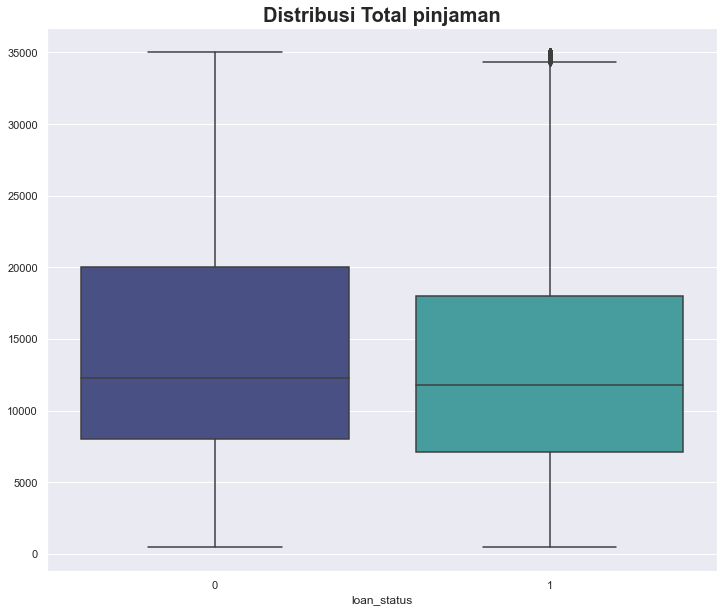

In [25]:
x,y = "loan_status","loan_amnt"

plt.figure(figsize=(12,10))
sns.boxplot(data = pas_df, x=x , y=y, palette = "mako")
plt.title("Distribusi Total pinjaman",fontdict=title_font)
plt.ylabel("")
plt.show()

Rata-rata pinjaman tertinggi terdapat pada status buruk

In [26]:
pas_df.groupby(x)[y].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,52956.0,14381.234893,8379.093241,500.0,8000.0,12250.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


## Tujuan Mengambil Pinjaman

tujuan pinjaman didomanasi untuk menutup piinjaman sebelumnya, maka dapat dikataktan kebanyakan peminjam melakukan sistem "gali lubang tutup lubang". Dapat dilihat pula tujuan dari pinjaman lebih banyak untuk kegiatan konsumtif dari setiap individu, daripada untuk tujuan seperti berbisnis, dan biaya pendidikan.

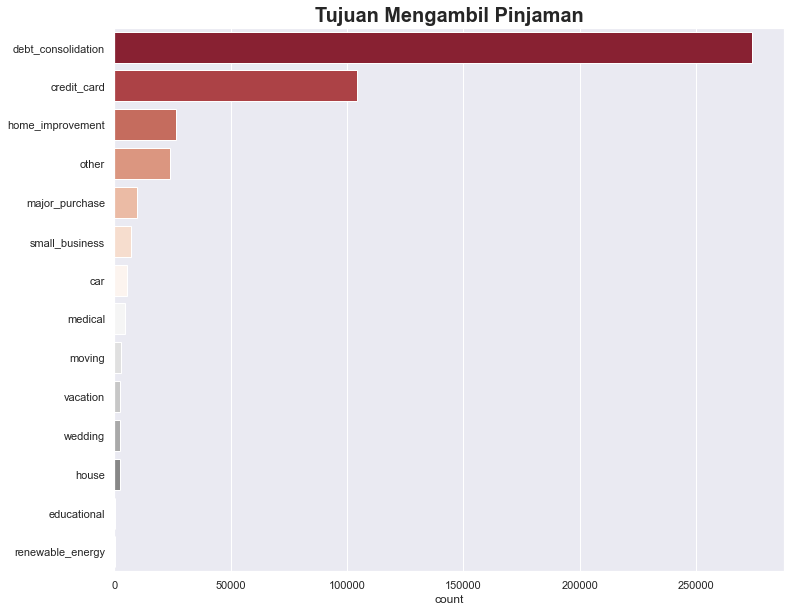

debt_consolidation    58.80%
credit_card           22.34%
home_improvement       5.69%
other                  5.08%
major_purchase         2.11%
small_business         1.50%
car                    1.16%
medical                0.99%
moving                 0.64%
vacation               0.53%
wedding                0.50%
house                  0.49%
educational            0.09%
renewable_energy       0.08%
Name: purpose, dtype: object


In [27]:
countplot(pas_df, y="purpose", title="Tujuan Mengambil Pinjaman",palette = "RdGy")

# Status Pinjaman dan Total Pembayaran 

Terlihat jelas bahwa individu yang berstatus good loan memiliki jumlah pembayaran terbanyak pada pinjaman.

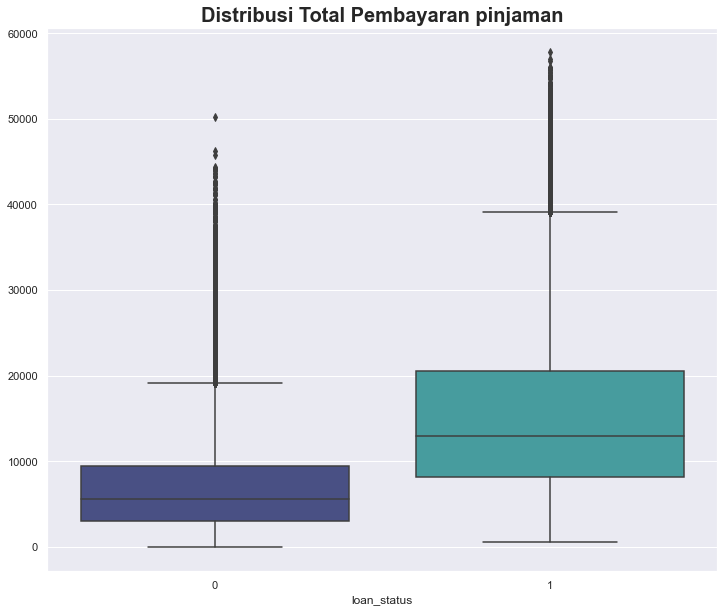

In [28]:
x,y = "loan_status","total_pymnt"

plt.figure(figsize=(12,10))
sns.boxplot(data = pas_df, x=x , y=y, palette = "mako")
plt.title("Distribusi Total Pembayaran pinjaman",fontdict=title_font)
plt.ylabel("")
plt.show()

# Tingkat Pinjaman Nasabah

Pinjaman diberikan tingkatan dari A-G dengan keterangan semakin mendekati G maka bunga pinjaman yang dibayarkan oleh nasabah lebih besar. Dapat dilihat jika Tingkat pinjaman nasabah masih didominasi di tingkat B yang menandakan bunga pinjaman yang dibayarkan kebanyakan nasabah tidak begitu besar jumlahnya.

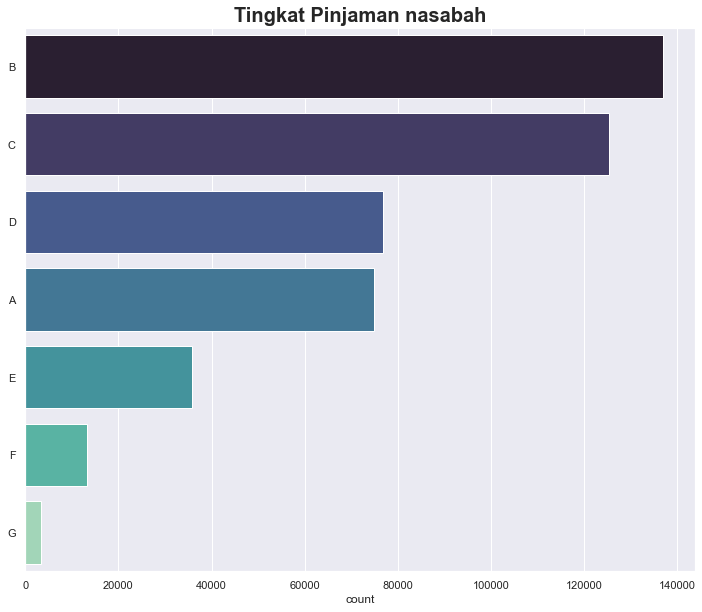

B    29.37%
C    26.87%
D    16.49%
A    16.06%
E     7.67%
F     2.84%
G     0.71%
Name: grade, dtype: object


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39442.0,7.548168,1.002794,5.42,6.62,7.62,8.39,9.63
B,71990.0,11.655058,1.281117,6.00,10.74,11.71,12.49,14.09
C,60683.0,14.761604,1.230658,6.00,13.98,14.64,15.61,17.27
D,38431.0,17.623471,1.476423,6.00,16.59,17.77,18.75,20.31
E,17911.0,20.358628,1.892720,6.00,19.52,20.80,21.70,23.40
F,7273.0,23.185256,2.061702,6.00,22.95,23.70,24.50,25.57
G,1965.0,24.277267,2.467776,16.59,23.91,25.80,25.83,26.06


In [29]:
x, y = "int_rate", "grade"
tingkat = pas_df[y].sort_values().unique()
countplot(df=pas_df, y=y, title="Tingkat Pinjaman nasabah",palette = "mako")
pas_df.groupby(y)[x].describe()

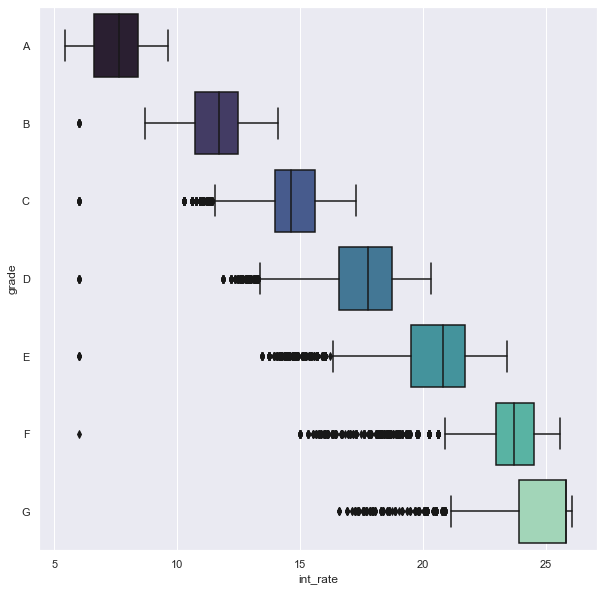

NameError: name 'df_loan' is not defined

In [20]:
x = "int_rate"
y = "grade"
order = pas_df[y].sort_values().unique()
plt.figure(figsize=(10,10))
sns.boxplot(data=pas_df, x=x, y=y ,order=order,palette = "mako")
plt.show()

df_loan.groupby(y)[x].describe()

# Status Kepemilikan Rumah

Kebanyakan peminjaam menjamin rumahnya sebagai jaminan pinjaman jika peminjam tidak sanggup untuk membayarkan seluruh pinjaman dan bunga pinjaman yang ada, namun status kepimilikan rumah sendiri dari setiap individu masi tergolong sedikit.

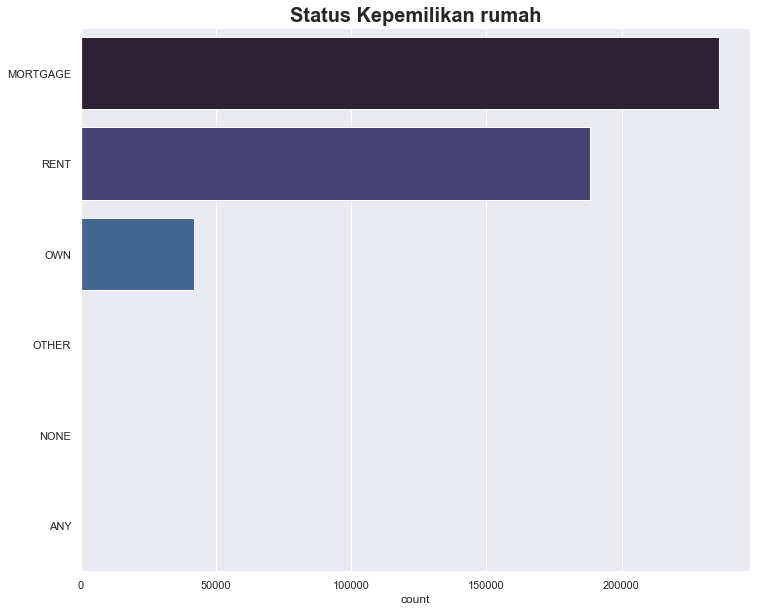

MORTGAGE    50.59%
RENT        40.42%
OWN          8.94%
OTHER        0.04%
NONE         0.01%
ANY          0.00%
Name: home_ownership, dtype: object


In [30]:
y = "home_ownership"
home = pas_df[y].sort_values().unique()
countplot(df=pas_df, y=y, title="Status Kepemilikan rumah",palette = "mako")

# DATA CLEANING,PREPROCESSING

In [31]:
pas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    224305 non-null  object 
 12  emp_length                   228539 non-null  object 
 13 

In [32]:
feature = pd.DataFrame()
feature.index = pas_df.columns
feature["unique_value"] = pas_df.nunique()
feature["missing_rate"] = pas_df.isna().mean()
feature["type"] = pas_df.dtypes
feature

,unique_value,missing_rate,type
Unnamed: 0,237695,0.000000,int64
id,237695,0.000000,int64
member_id,237695,0.000000,int64
loan_amnt,1310,0.000000,int64
funded_amnt,1313,0.000000,int64
funded_amnt_inv,9558,0.000000,float64
term,2,0.000000,object
int_rate,505,0.000000,float64
installment,43723,0.000000,float64
grade,7,0.000000,object


### feature yang dibuang akrena memilikia banyak missing value, unique data yang terlalu banyak, data ketegori yang banyakm dan feature yang terdiri dari satu nilai

In [33]:
#1
uni = feature[feature["unique_value"] == pas_df.shape[0]].index.to_list()
print("Feature Yang memiliki unik value terlalu banyak")
print(uni)
print("---------")

# 2 
col = feature[feature["type"] == "object"]
some_col = col[col["unique_value"] > 1000].index.to_list()
print("Feature dengan Kategorik Banyak")
print(some_col)
print("---------")

# 3
col_sing_val = feature[feature["unique_value"] == 1].index.to_list()
print("Feature terdiri dari 1 Var")
print(col_sing_val)

features_drop = uni + some_col + col_sing_val

Feature Yang memiliki unik value terlalu banyak
['Unnamed: 0', 'id', 'member_id', 'url']
---------
Feature dengan Kategorik Banyak
['emp_title', 'url', 'desc', 'title']
---------
Feature terdiri dari 1 Var
['policy_code', 'application_type']


In [34]:
# Drop feature yang tidak dipakai
df_gas = pas_df.loc[:, ~pas_df.columns.isin(features_drop)].copy()
df_gas.shape

(237695, 49)

In [35]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    237695 non-null  int64  
 1   funded_amnt                  237695 non-null  int64  
 2   funded_amnt_inv              237695 non-null  float64
 3   term                         237695 non-null  object 
 4   int_rate                     237695 non-null  float64
 5   installment                  237695 non-null  float64
 6   grade                        237695 non-null  object 
 7   sub_grade                    237695 non-null  object 
 8   emp_length                   228539 non-null  object 
 9   home_ownership               237695 non-null  object 
 10  annual_inc                   237691 non-null  float64
 11  verification_status          237695 non-null  object 
 12  issue_d                      237695 non-null  object 
 13 

In [36]:
df_gas.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


# FEATURE NUMERICAL

In [37]:
cor = (df_gas.select_dtypes(exclude=object).corr())

In [38]:
cor["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.469205
recoveries                     0.409024
last_pymnt_amnt                0.403200
total_pymnt_inv                0.362003
total_pymnt                    0.359668
out_prncp                      0.280483
out_prncp_inv                  0.280472
collection_recovery_fee        0.275679
int_rate                       0.251108
total_rec_late_fee             0.165734
dti                            0.119055
inq_last_6mths                 0.107468
revol_util                     0.093994
tot_cur_bal                    0.077290
total_rec_int                  0.063272
annual_inc                     0.060383
loan_amnt                      0.060230
funded_amnt                    0.060127
mths_since_last_record         0.056226
total_rev_hi_lim               0.055497
funded_amnt_inv                0.052586
installment                    0.042451
mths_since_last_delinq         0.033466
delinq_2yrs                    0.028245


In [39]:
# korelasi antara vmin dan vmax
vmin, vmax = 0.1,0.99
unstack_corr = cor.unstack()
posi_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
nega_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[posi_corr | nega_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [40]:
loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
loan

total_rec_prncp            0.469205
recoveries                 0.409024
last_pymnt_amnt            0.403200
total_pymnt_inv            0.362003
total_pymnt                0.359668
out_prncp                  0.280483
out_prncp_inv              0.280472
collection_recovery_fee    0.275679
int_rate                   0.251108
total_rec_late_fee         0.165734
dti                        0.119055
inq_last_6mths             0.107468
dtype: float64

In [41]:
numerical_use = ["total_rec_prncp","recoveries","last_pymnt_amnt","total_pymnt_inv","collection_recovery_fee","int_rate"]

# hapus feature numerikal yang tidak digunakan
deleted_num = loan[~loan.isin(numerical_use)]
df_gas = df_gas.drop(columns=deleted_num, errors = "ignore")
df_gas.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


#FEATURE DATE TYPE

In [42]:
feat_date = [ "last_pymnt_d", "last_credit_pull_d","issue_d", "earliest_cr_line", "next_pymnt_d"]

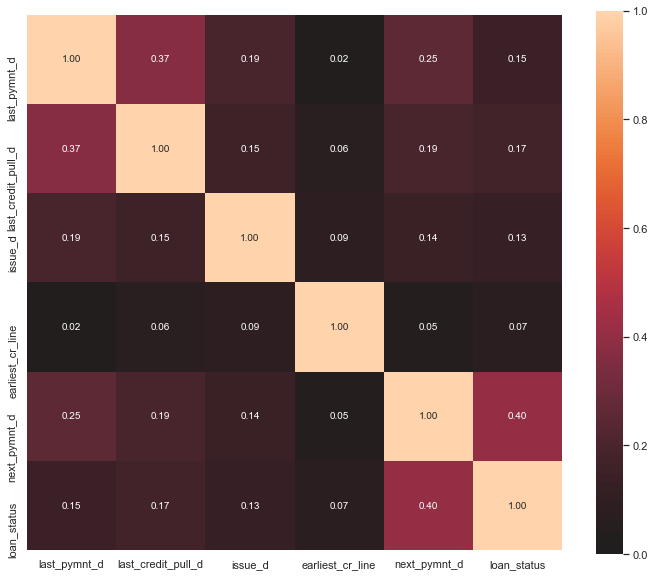

In [43]:
#Korelasi data type date dengan loan_status
cor_date = feat_date + ["loan_status"]
corr = associations(df_gas[cor_date], figsize=(12,10))

Menggunakan feature date dengan korelasi >0,15

In [44]:
# Penggunaan fitur date
use_date = ["last_pymnt_d","next_pymnt_d", "last_credit_pull_d"]
use_date

['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [45]:
#Menghapus feature date yang tidak memiliki korelasi baik dengan loan_status
deleted_date = ["issue_d", "earliest_cr_line"]
df_gas = df_gas.drop(columns = deleted_date, errors = "ignore")
df_gas.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


## FEATURE CATEGORICAL

In [46]:
# Feature kategorik
feat_cat = df_gas.select_dtypes(include=object).columns
feat_cat_1 = feat_cat[~feat_cat.isin(feat_date)]
feat_cat_1

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [47]:
df_gas.loc[:,feat_cat_1].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f


In [48]:
#feature sub grade yang memiliki jenis yang sama dengan grade, maka perlu dihapus
not_use_cat = ["sub_grade"]
df_gas = df_gas.drop(columns=not_use_cat, errors = "ignore")
df_gas.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [49]:
feat_cat_new = feat_cat_1[~feat_cat_1.isin(feat_date + not_use_cat)]
feat_cat_new

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status'],
      dtype='object')

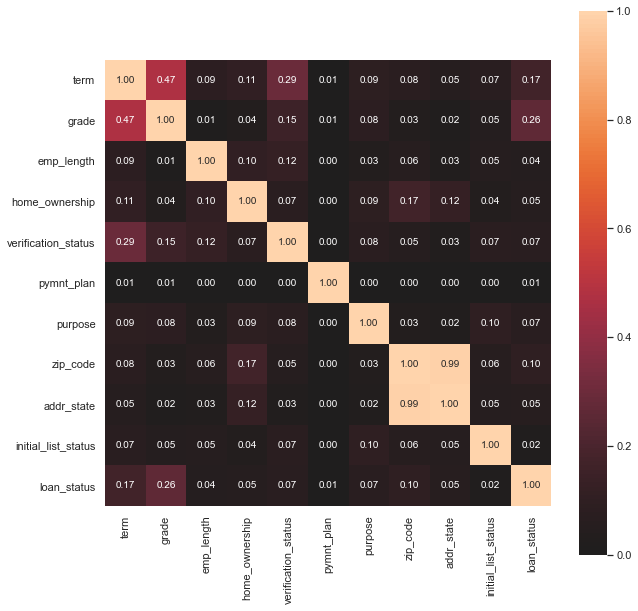

In [50]:
#Melihat korelasi data ketegorik
cor_cat = feat_cat_new.to_list() + ["loan_status"]
corr_cat_1 = associations(df_gas[cor_cat],
                    figsize=(10,10))


hanya feature term dan grade yang memiliki korelasi baik dengan loan_status

In [51]:
cat_use = ['term','grade']
cat_use

['term', 'grade']

In [52]:
feat_cat_new

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status'],
      dtype='object')

In [53]:
delete_cat = feat_cat_new[~feat_cat_new.isin(cat_use)]
df_gas = df_gas.drop(columns=delete_cat, errors = "ignore")
df_gas.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,loan_status,dti,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,1,27.65,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,0,1.00,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,1,8.72,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,1,20.00,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,1,11.20,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [54]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    237695 non-null  int64  
 1   funded_amnt                  237695 non-null  int64  
 2   funded_amnt_inv              237695 non-null  float64
 3   term                         237695 non-null  object 
 4   int_rate                     237695 non-null  float64
 5   installment                  237695 non-null  float64
 6   grade                        237695 non-null  object 
 7   annual_inc                   237691 non-null  float64
 8   loan_status                  237695 non-null  int64  
 9   dti                          237695 non-null  float64
 10  delinq_2yrs                  237666 non-null  float64
 11  inq_last_6mths               237666 non-null  float64
 12  mths_since_last_delinq       104703 non-null  float64
 13 

## FEATURE TARGET + FEATURE DIGUNAKAN

In [55]:
feat_pred = numerical_use + cat_use + use_date
feat_pred

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'total_pymnt_inv',
 'collection_recovery_fee',
 'int_rate',
 'term',
 'grade',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

#Missing Values

In [56]:
check_missing = df_gas[feat_pred].isnull().sum() * 100 / df_gas.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

next_pymnt_d          95.590568
last_pymnt_d           0.158186
last_credit_pull_d     0.009676
dtype: float64

In [57]:
# inputing missing value 
df_gas["next_pymnt_d"] = df_gas["next_pymnt_d"].fillna("NaN")
df_gas["last_pymnt_d"] = df_gas["last_pymnt_d"].fillna("NaN")
df_gas["last_credit_pull_d"] = df_gas["last_credit_pull_d"].fillna("NaN")

In [58]:
check_missing = df_gas[feat_pred].isnull().sum() * 100 / df_gas.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

#FEATURE SCALING AND TRANSFORMATION

In [59]:
target = df_gas["loan_status"].copy()
features = df_gas[feat_pred].copy()

## One Hot Encoding

In [60]:
categorical_feature = features.select_dtypes(include="object")
onehot = pd.get_dummies(categorical_feature)
onehot

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,last_pymnt_d_Apr-08,...,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466277,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466278,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466281,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization Numerical Featureas

In [64]:
numerical_features = features.select_dtypes(exclude="object")
normalization =  (numerical_features - numerical_features.mean()) / numerical_features.std()
normalization

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,collection_recovery_fee,int_rate
0,-0.748267,-0.218991,-0.804504,-0.790336,-0.147598,-0.729566
1,-1.304900,-0.065846,-0.812085,-1.302923,-0.138279,0.325510
2,-1.066796,-0.218991,-0.734728,-1.090904,-0.147598,0.483087
3,-0.135713,-0.218991,-0.777390,-0.110738,-0.147598,-0.080991
5,-0.748267,-0.218991,-0.806049,-0.811634,-0.147598,-1.357588
...,...,...,...,...,...,...
466276,-1.316708,1.297550,-0.797789,-1.194390,-0.050256,1.006057
466277,-0.799613,-0.218991,-0.747374,-0.812434,-0.147598,-1.357588
466278,-0.135713,-0.218991,-0.026932,-0.092897,-0.147598,1.006057
466281,-1.135764,-0.218991,-0.826989,-0.912966,-0.147598,1.398856


In [67]:
#penggabungan semua features
features_predict =pd.concat([onehot, normalization], axis=1)


In [69]:
features_predict.shape

(237695, 318)

## PERMODELAN REGRESI LOGISTIK

X_train, X_test, y_train, y_test = train_test_split(features_predict, target, test_size = 0.2, random_state = 42, stratify=target)

In [74]:
logregs = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logregs

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [75]:
logregs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [77]:
import itertools
import joblib
import os

In [78]:
joblib.dump(logregs, "logres.z")

['logres.z']

In [79]:
logregs = joblib.load("logres.z")

## MODEL EVALUATION

### Train Data

In [81]:
logregs.score(X_train, y_train)

0.9663644586549991

In [82]:
report_classification = classification_report(y_true=y_train, y_pred=logregs.predict(X_train))
print(report_classification)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     42365
           1       0.99      0.96      0.98    147791

    accuracy                           0.97    190156
   macro avg       0.94      0.97      0.95    190156
weighted avg       0.97      0.97      0.97    190156



### Test Data

In [83]:
logregs.score(X_test, y_test)

0.9675003681188077

In [84]:
report_classification = classification_report(y_true=y_test, y_pred=logregs.predict(X_test))
print(report_classification)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10591
           1       0.99      0.97      0.98     36948

    accuracy                           0.97     47539
   macro avg       0.94      0.97      0.95     47539
weighted avg       0.97      0.97      0.97     47539



### Matrix Coeficient

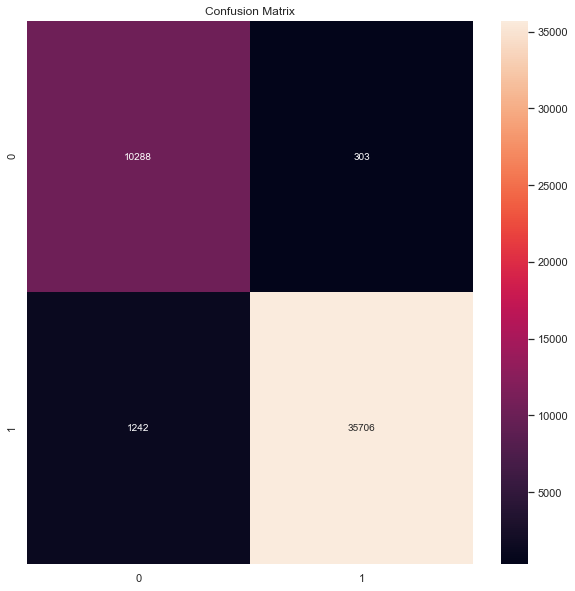

In [85]:
coeff_matrix = confusion_matrix(y_true=y_test, y_pred=logregs.predict(X_test))
plt.figure(figsize=(10,10))
sns.heatmap(coeff_matrix, annot=True, fmt="g")
plt.title("Confusion Matrix")
plt.show()

### ROC AUC CURVE

In [ ]:
y_pred_proba = logregs.predict_proba(X_test)[:][:,1]

df_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_act']), pd.DataFrame(y_pred_proba, columns=['y_prob'])], axis=1)
df_predicted.index = y_test.index

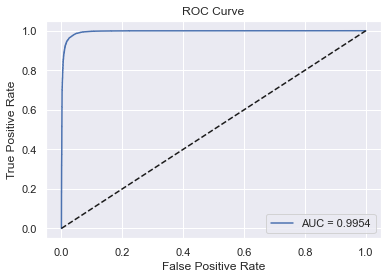

In [92]:
fpr, tpr, tr = roc_curve(df_predicted['y_act'], df_predicted['y_prob'])
auc = roc_auc_score(df_predicted['y_act'], df_predicted['y_prob'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()